In [1]:
import pandas as pd
import glob
import os
import numpy as np

#### We have created data set of all months into one by using special method

In [2]:
# Import libraries
#import glob
#import pandas as pd

# Get CSV files list from a folder
#path = '/apps/data_csv_files
#csv_files = glob.glob(path + "/*.csv")

# Read each CSV file into DataFrame
# This creates a list of dataframes
#df_list = (pd.read_csv(file) for file in csv_files)

# Concatenate all DataFrames
#big_df   = pd.concat(df_list, ignore_index=True)

In [3]:
Df=pd.read_csv('D:/Data scince/Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/AllData.CSV') #reading the new file that contains all of the months that we just have created

In [4]:
DF=Df.dropna() #Drop the rows with missing values

In [5]:
DF.isnull().sum() #Check for nulls

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [6]:
result = DF.dtypes  #Checking for the type of our data
DF

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


### We need to drop the columns title (indecies) Because when we merged the data of 12 months we included the data's columns names so we now have 11 rows that should be drop to clean our data

In [7]:
DF['Quantity Ordered'].astype('string') #Change the type from Object to a string
print(DF)


       Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46           

In [8]:
#As we merged the data we have added the index row for all months in the data now we need to get rid of them :)#
DF = DF[DF['Quantity Ordered'] != 'Quantity Ordered']
DF = DF[DF['Price Each'] != 'Price Each']

In [9]:
#Now we should make it a float type instead of object#
DF['Quantity Ordered']=DF['Quantity Ordered'].astype(float)
DF['Price Each']=DF['Price Each'].astype(float)

In [10]:
DF['Tota Price']=DF['Quantity Ordered']*DF['Price Each']

### Now we check the months and the amount of sales for each mounth to check which month has the highest sales

In [11]:
#No I haven't wrote the code below manualy I used some Excel magic (Function, Because there's "fun" in "function" ; )
JanDF=DF[DF['Order Date'].str.slice(0,3).str.contains("01/")]
print (JanDF['Tota Price'].sum())
FebDF=DF[DF['Order Date'].str.slice(0,3).str.contains("02/")]
print (FebDF['Tota Price'].sum())
MarDF=DF[DF['Order Date'].str.slice(0,3).str.contains("03/")]
print (MarDF['Tota Price'].sum())
AprDF=DF[DF['Order Date'].str.slice(0,3).str.contains("04/")]
print (AprDF['Tota Price'].sum())
MayDF=DF[DF['Order Date'].str.slice(0,3).str.contains("05/")]
print (MayDF['Tota Price'].sum())
JunDF=DF[DF['Order Date'].str.slice(0,3).str.contains("06/")]
print (JunDF['Tota Price'].sum())
JulDF=DF[DF['Order Date'].str.slice(0,3).str.contains("07/")]
print (JulDF['Tota Price'].sum())
AugDF=DF[DF['Order Date'].str.slice(0,3).str.contains("08/")]
print (AugDF['Tota Price'].sum())
SepDF=DF[DF['Order Date'].str.slice(0,3).str.contains("09/")]
print (SepDF['Tota Price'].sum())
OctDF=DF[DF['Order Date'].str.slice(0,3).str.contains("10/")]
print (OctDF['Tota Price'].sum())
NovDF=DF[DF['Order Date'].str.slice(0,3).str.contains("11/")]
print (NovDF['Tota Price'].sum())
DecDF=DF[DF['Order Date'].str.slice(0,3).str.contains("12/")]
print (DecDF['Tota Price'].sum())



1822256.73
2202022.42
2807100.38
3390670.2399999993
3152606.7499999995
2577802.26
2647775.76
2244467.88
2097560.13
3736726.8799999994
3199603.1999999997
4613443.34


In [12]:
QT=pd.DataFrame()
QT["Month"]=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November','December']
QT["Total sales"]=[JanDF['Tota Price'].sum(),FebDF['Tota Price'].sum(),MarDF['Tota Price'].sum(),AprDF['Tota Price'].sum(),MayDF['Tota Price'].sum(),JunDF['Tota Price'].sum(),JulDF['Tota Price'].sum(),AugDF['Tota Price'].sum(),SepDF['Tota Price'].sum(),OctDF['Tota Price'].sum(),NovDF['Tota Price'].sum(),DecDF['Tota Price'].sum()]

In [13]:
QT

,Month,Total sales
0,January,1822256.73
1,February,2202022.42
2,March,2807100.38
3,April,3390670.24
4,May,3152606.75
5,June,2577802.26
6,July,2647775.76
7,August,2244467.88
8,September,2097560.13
9,October,3736726.88


In [14]:
MaxSell=QT["Total sales"].idxmax() #Index of row with most sales
print ("The month with most sales")
print(QT.loc[[MaxSell]]) #print that row :D

The month with most sales
       Month  Total sales
11  December   4613443.34


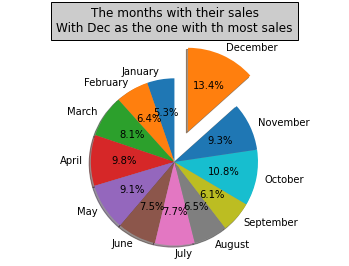

In [15]:
import matplotlib.pyplot as plt #Some plotting magic don't worry about it ;).
explode = (0, 0, 0, 0,0, 0, 0, 0,0, 0, 0, 0.4)
fig1, ax1 = plt.subplots()
ax1.pie(QT["Total sales"],explode=explode,labels=QT["Month"], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("The months with their sales\n" + "With Dec as the one with th most sales", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

### Now to find which item was sold the most and the lowest

In [16]:
print (DF['Product'].value_counts()) #Number of sold items witout the quantity 
Test1 = DF['Product'].unique() 

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64


In [17]:
Test1 #Getting all the tyoes of items that are sold

array(['USB-C Charging Cable', 'Bose SoundSport Headphones',
       'Google Phone', 'Wired Headphones', 'Macbook Pro Laptop',
       'Lightning Charging Cable', '27in 4K Gaming Monitor',
       'AA Batteries (4-pack)', 'Apple Airpods Headphones',
       'AAA Batteries (4-pack)', 'iPhone', 'Flatscreen TV',
       '27in FHD Monitor', '20in Monitor', 'LG Dryer', 'ThinkPad Laptop',
       'Vareebadd Phone', 'LG Washing Machine', '34in Ultrawide Monitor'],
      dtype=object)

In [18]:
Item1 = DF[DF['Product'].str.contains('AAA Batteries (4-pack)')] #Because of the name has so many symbols like "(), -" it could ruin our dataframe
Item1 #See! Nothing is printed :( but don't worry we will fix it :D

C:\Users\maxia\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Tota Price


In [19]:
NumberOfSoldItems = pd.DataFrame({"Item": [], "Quantity sold": []})
NumberOfSoldItems

,Item,Quantity sold


In [22]:
for x  in range(19): #New data frame of the sold items plus the quantity and add "new" row just to double check
    Item1 = DF[DF['Product'].str.contains(Test1[x])]
    
    NumberOfSoldItems['Quantity sold'].loc[x] = Item1['Quantity Ordered'].sum()
    NumberOfSoldItems['Item'].loc[x]= Test1[x]
    
NumberOfSoldItems["new"]= NumberOfSoldItems['Quantity sold']
NumberOfSoldItems.sort_values('Quantity sold') #As we mentioned for the battries it created a problem for us because we are pretty sure it's impossible to be 0

C:\Users\maxia\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\maxia\anaconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Item,Quantity sold,new
9,AAA Batteries (4-pack),0.0,0.0
7,AA Batteries (4-pack),0.0,0.0
14,LG Dryer,646.0,646.0
17,LG Washing Machine,666.0,666.0
16,Vareebadd Phone,2068.0,2068.0
13,20in Monitor,4129.0,4129.0
15,ThinkPad Laptop,4130.0,4130.0
4,Macbook Pro Laptop,4728.0,4728.0
11,Flatscreen TV,4819.0,4819.0
2,Google Phone,5532.0,5532.0


In [28]:
NumberOfSoldItems.drop([7,9], axis=0, inplace=True) #Drop the battries from the DF

KeyError: '[7 9] not found in axis'

In [29]:
NumberOfSoldItems

,Item,Quantity sold,new
0,USB-C Charging Cable,23975.0,23975.0
1,Bose SoundSport Headphones,13457.0,13457.0
2,Google Phone,5532.0,5532.0
3,Wired Headphones,20557.0,20557.0
4,Macbook Pro Laptop,4728.0,4728.0
5,Lightning Charging Cable,23217.0,23217.0
6,27in 4K Gaming Monitor,6244.0,6244.0
8,Apple Airpods Headphones,15661.0,15661.0
10,iPhone,6849.0,6849.0
11,Flatscreen TV,4819.0,4819.0


In [30]:
AABattries = DF[DF['Product'].str.slice(0,3).str.contains('AA ')] #Now we add the real number of sold Battries 
AAABattries = DF[DF['Product'].str.slice(0,3).str.contains('AAA')]

### As we can see below that's definitely not a 0

In [31]:
AABattries['Quantity Ordered'].sum()

27635.0

In [32]:
AAABattries['Quantity Ordered'].sum()

31017.0

In [33]:
NumberOfSoldBattries = pd.DataFrame({"Item": ["AABattries",'AAABattries'], "Quantity sold": [27635.0,31017.0], "new": [27635.0,31017.0]})

In [34]:
NumberOfSoldBattries

,Item,Quantity sold,new
0,AABattries,27635.0,27635.0
1,AAABattries,31017.0,31017.0


In [35]:

Totalsolditems = NumberOfSoldItems.append(NumberOfSoldBattries)

In [36]:
Totalsolditems.sort_values('Quantity sold') #Battries are actually the most sold items , Shocking D: lol jk obvious

,Item,Quantity sold,new
14,LG Dryer,646.0,646.0
17,LG Washing Machine,666.0,666.0
16,Vareebadd Phone,2068.0,2068.0
13,20in Monitor,4129.0,4129.0
15,ThinkPad Laptop,4130.0,4130.0
4,Macbook Pro Laptop,4728.0,4728.0
11,Flatscreen TV,4819.0,4819.0
2,Google Phone,5532.0,5532.0
18,34in Ultrawide Monitor,6199.0,6199.0
6,27in 4K Gaming Monitor,6244.0,6244.0


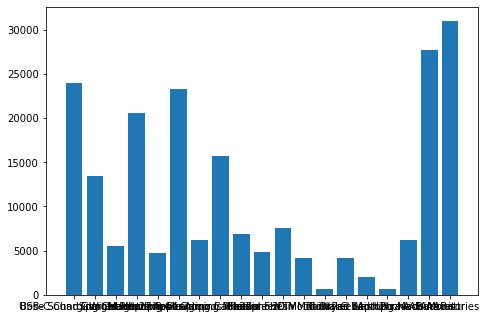

In [40]:
fig = plt.figure() #Plot magic again
ax = fig.add_axes([0,0,1,1])
ax.bar(Totalsolditems['Item'],Totalsolditems['Quantity sold'])
plt.show()

### Reindexing our mess that we created

In [46]:
Totalsolditems.reset_index(drop=True, inplace=True)
Totalsolditems

,Item,Quantity sold,new
0,USB-C Charging Cable,23975.0,23975.0
1,Bose SoundSport Headphones,13457.0,13457.0
2,Google Phone,5532.0,5532.0
3,Wired Headphones,20557.0,20557.0
4,Macbook Pro Laptop,4728.0,4728.0
5,Lightning Charging Cable,23217.0,23217.0
6,27in 4K Gaming Monitor,6244.0,6244.0
7,Apple Airpods Headphones,15661.0,15661.0
8,iPhone,6849.0,6849.0
9,Flatscreen TV,4819.0,4819.0


In [47]:
print(Totalsolditems.loc[[Totalsolditems['new'].idxmax()]]) #vualá

           Item  Quantity sold      new
18  AAABattries        31017.0  31017.0


In [ ]:
###Now we create a way to find which items are mostly sold together for exammple iPhone. Note: We can check whatever item iPhone is just an example

In [48]:
DF

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Tota Price
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",11.99
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",8.97
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",700.00
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",700.00
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",379.99


In [53]:
aggregation_functions = {'Product': 'sum', 'Quantity Ordered': 'sum', 'Price Each': 'sum'} #Summing rows with the same Order ID that meansthe items that were sold at the same time
df_new = DF.groupby(DF['Order ID']).aggregate(aggregation_functions)

In [68]:
df_new['Product'].value_counts() #We see items sold separately are the highest ... Duh  


Lightning Charging Cable                                  19831
AAA Batteries (4-pack)                                    19826
AA Batteries (4-pack)                                     19809
USB-C Charging Cable                                      19792
Wired Headphones                                          17208
                                                          ...  
LG Dryer27in FHD Monitor                                      1
iPhoneLightning Charging CableVareebadd Phone                 1
Google PhoneBose SoundSport Headphones27in FHD Monitor        1
LG DryerVareebadd Phone                                       1
LG DryerGoogle Phone                                          1
Name: Product, Length: 385, dtype: int64

In [79]:
iPhoneItems = df_new[df_new['Product'].str.contains('iPhone')] #Now we check which items mostly sold wth iPhone. We noticed Charging caples and headphones which make sense because they are widgets so placing them together in a store might be a good idea
iPhoneItems['Product'].value_counts()

iPhone                                                                                4975
iPhoneLightning Charging Cable                                                         882
iPhoneWired Headphones                                                                 361
iPhoneApple Airpods Headphones                                                         286
iPhoneLightning Charging CableWired Headphones                                          56
iPhoneLightning Charging CableApple Airpods Headphones                                  43
iPhoneApple Airpods HeadphonesWired Headphones                                          23
AA Batteries (4-pack)iPhone                                                             18
AAA Batteries (4-pack)iPhone                                                            14
Apple Airpods HeadphonesiPhone                                                          13
Wired HeadphonesiPhone                                                                  13